# Sarcasm Dataset

In [34]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf


In [35]:
# This code is related to limiting the tensorflow GPU ---------------------------

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [36]:
# Loading the json data
# f = open('../News Headlines Dataset for Sarcasm Detection/Sarcasm_Headlines_Dataset.json',)
# json.load(f)

Reading the data through pandas dataframe then converting it into the list ....because i like Pandas :)

In [37]:
# reading the json file
df = pd.read_json('../News Headlines Dataset for Sarcasm Detection/Sarcasm_Headlines_Dataset.json',lines=True)

In [38]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [39]:
df.tail()

,article_link,headline,is_sarcastic
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0
26708,https://www.huffingtonpost.com/entry/gourmet-g...,gourmet gifts for the foodie 2014,0


In [40]:
df.columns

Index(['article_link', 'headline', 'is_sarcastic'], dtype='object')

In [41]:
sentences = df['headline']
labels = df['is_sarcastic']

In [42]:
sentences = list(sentences)
labels = list(labels)
type(sentences),type(labels)

(list, list)

In [43]:
len(sentences),len(labels)

(26709, 26709)

In [44]:
training_size = 20000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOv>"
#training_size = 20000

tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

testing_tokenizer = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_tokenizer,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [46]:
# Now lets convert all the final data into numpy array to get to work on Tensorflow 2.x
training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)



In [47]:
training_padded.shape

(20000, 100)

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.summary()
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [49]:
hist = model.fit(training_padded,training_labels,epochs=30,validation_data=(testing_padded,testing_labels))

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 [==============================] - 3s 127us/sample - loss: 0.6688 - accuracy: 0.5710 - val_loss: 0.5989 - val_accuracy: 0.6722
Epoch 2/30
20000/20000 [==============================] - 2s 115us/sample - loss: 0.4433 - accuracy: 0.8256 - val_loss: 0.3869 - val_accuracy: 0.8419
Epoch 3/30
20000/20000 [==============================] - 2s 121us/sample - loss: 0.3130 - accuracy: 0.8754 - val_loss: 0.3565 - val_accuracy: 0.8498
Epoch 4/30
20000/20000 [==============================] - 2s 109us/sample - loss: 0.2592 - accuracy: 0.8992 - val_loss: 0.3467 - val_accuracy: 0.8556
Epoch 5/30
20000/20000 [==============================] - 2s 105us/sample - loss: 0.2223 - accuracy: 0.9125 - val_loss: 0.3534 - val_accuracy: 0.8496
Epoch 6/30
20000/20000 [==============================] - 2s 107us/sample - loss: 0.1932 - accuracy: 0.9268 - val_loss: 0.3558 - val_accuracy: 0.8544
Epoch 7/30
20000/20000 [===========================

In [50]:
print(training_sentences[2])
print(labels[2])

mom starting to fear son's web series closest thing she will have to grandchild
1


In [54]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


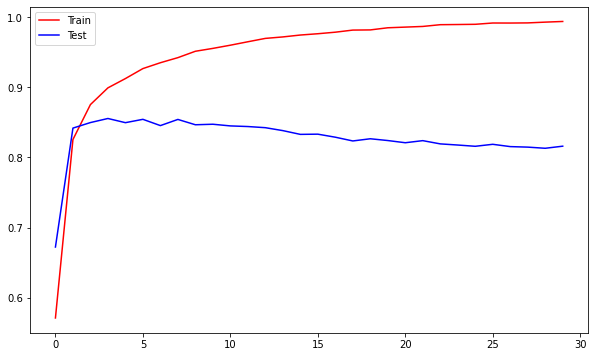

In [51]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'b')
plt.legend(['Train','Test'],loc='best')

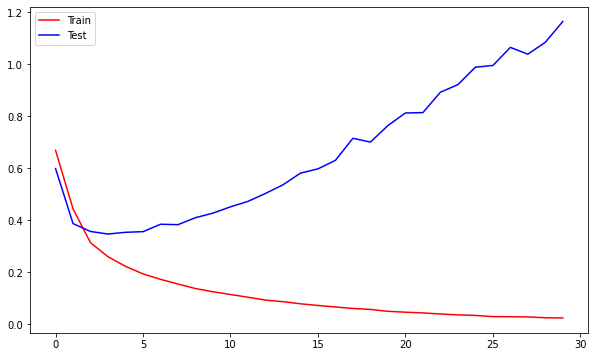

In [52]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'b')
plt.legend(['Train','Test'],loc='best')

# Predictions

In [53]:
sentence = ['granny starting to fear spiders in the farden might be real','game of thrones season finale showing this sunday night']

# preprocessing the text
sequence = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequence,maxlen=max_length,padding=padding_type,truncating=trunc_type)

#predicting the text
print(model.predict(padded))

[[2.8602037e-04]
 [7.6927836e-07]]
